# Global and Local change of Gene expression between Two brain: Fetal forebrain and Postnatal brain
<br/><br/>
태어나기 이전의 뇌와 태어나고 발달과정을 거친 뇌는 세포의 분화나 여러 측면에서 차이를 보이기 마련이다. 이러한 차이는 단일 세포의 수준에서 발현되는 RNA를 통해서도 관찰될 것이다. 따라서 이 포트폴리오에서는 fetal forebrain과 태어난 이후의 뇌에서 과연 gene expression분포에 어떤 차이가 있을지, 세포에서 발현되는 gene expression 정도의 분포에서 발견할 수 있는 차이가 있을지를 탐구하고자 하였다. 또한 관심있는 세포에서 발현되는 gene의 분포는 어떻게 변화하는지를 보고자 했다. 

## Data Wrangling for Distribution of Cell and Gene according to Gene Expression


In [12]:
library(tidyverse)
library(readr)
library(Matrix)
library(ggpubr)
library(ggrepel)
library(ggExtra)

Warning message:
"package 'ggExtra' was built under R version 4.0.3"


<br/><br/>
single cell data는 Panglao dataset에서 다운로드 받아 사용했다. postnatal brain의 데이터는 `human_brain`에, fetal forebrain 데이터는 `fetal`에 할당하였고 cell type marker data는 `cell_mkr`에 gene ID나 gene symbol, gene family 등의 정보를 담은 데이터는 `gn`에 저장하여 이용하였다. 

In [2]:
load("SRA700673_SRS3270097.sparse.RData")
sample <- summary(sm)
human_brain <- data.frame(gene = rownames(sm)[sample$i],
           cell = colnames(sm)[sample$j], 
           value = sample$x)
load("SRA646572_SRS2833946.sparse.RData")
sample <- summary(sm)
fetal <- data.frame(gene = rownames(sm)[sample$i],
           cell = colnames(sm)[sample$j], 
           value = sample$x)
cell_mkr <- read.table("PanglaoDB_markers_27_Mar_2020.tsv", h = T, sep = "\t", quote = '')
gn <- read.delim("non_alt_loci_set_20201019.txt")

<br/><br/>
postnatal brain과 fetal brain 각각에서 gene 별로 발현양을 알아보기 위해서 `aggregate`function을 이용하여 같은 gene에 해당하는 경우 `value`를 더하도록 하여 `bfgene`이라는 데이터를 만들었다. 마찬가지로 cell별로 발현양을 알아보기 위해서 같은 gene에 해당하는 경우에 `value`를 더하도록 하여 `bfcell`을 만들었다. 

In [3]:
brain_ag_gene <- aggregate(value~gene, human_brain, sum) %>%
    mutate(group = "postnatal brain")
fetal_ag_gene <- aggregate(value~gene, fetal, sum) %>%
    mutate(group = "fetal forebrain")
bfgene <-rbind(brain_ag_gene, fetal_ag_gene) 

brain_ag_cell <- aggregate(value~cell, human_brain, sum) %>%
    mutate(group = "postnatal brain")
fetal_ag_cell <- aggregate(value~cell, fetal, sum) %>%
    mutate(group = "fetal forebrain")
bfcell <- rbind(brain_ag_cell, fetal_ag_cell)

## Discussion for Distribution of Cell and Gene according to Gene Expression

In [ ]:
A <- bfgene%>%
    ggplot(aes(value, color = group)) + 
    geom_histogram(fill = "white", alpha = 0.5, position = "identity", size = 1, show.legend = FALSE)+
    scale_x_log10(breaks = c(10^7, 10^5, 10^3, 10), labels = c(10^7, 10^5, 10^3, 10)) +
    labs(x = "Expression of Gene", y = "The Number of Gene")+
    coord_flip()+
    theme_classic(base_size = 20)+
    theme(text = element_text(size = 20))

In [ ]:
B <- bfcell%>%
    ggplot(aes(value, color = group)) + 
    geom_histogram(fill = "white", alpha = 0.5, position = "identity", size = 1)+
    scale_x_log10(breaks = c(10^7, 10^5, 10^3, 10), labels = c(10^7, 10^5, 10^3, 10)) +    
    labs(x = "Expression of Gene", y = "The Number of Cell")+
    coord_flip()+
    theme_classic(base_size = 20)+
    theme(text = element_text(size = 20),
          legend.position = c(.83, .9),
          axis.title.y = element_blank())

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



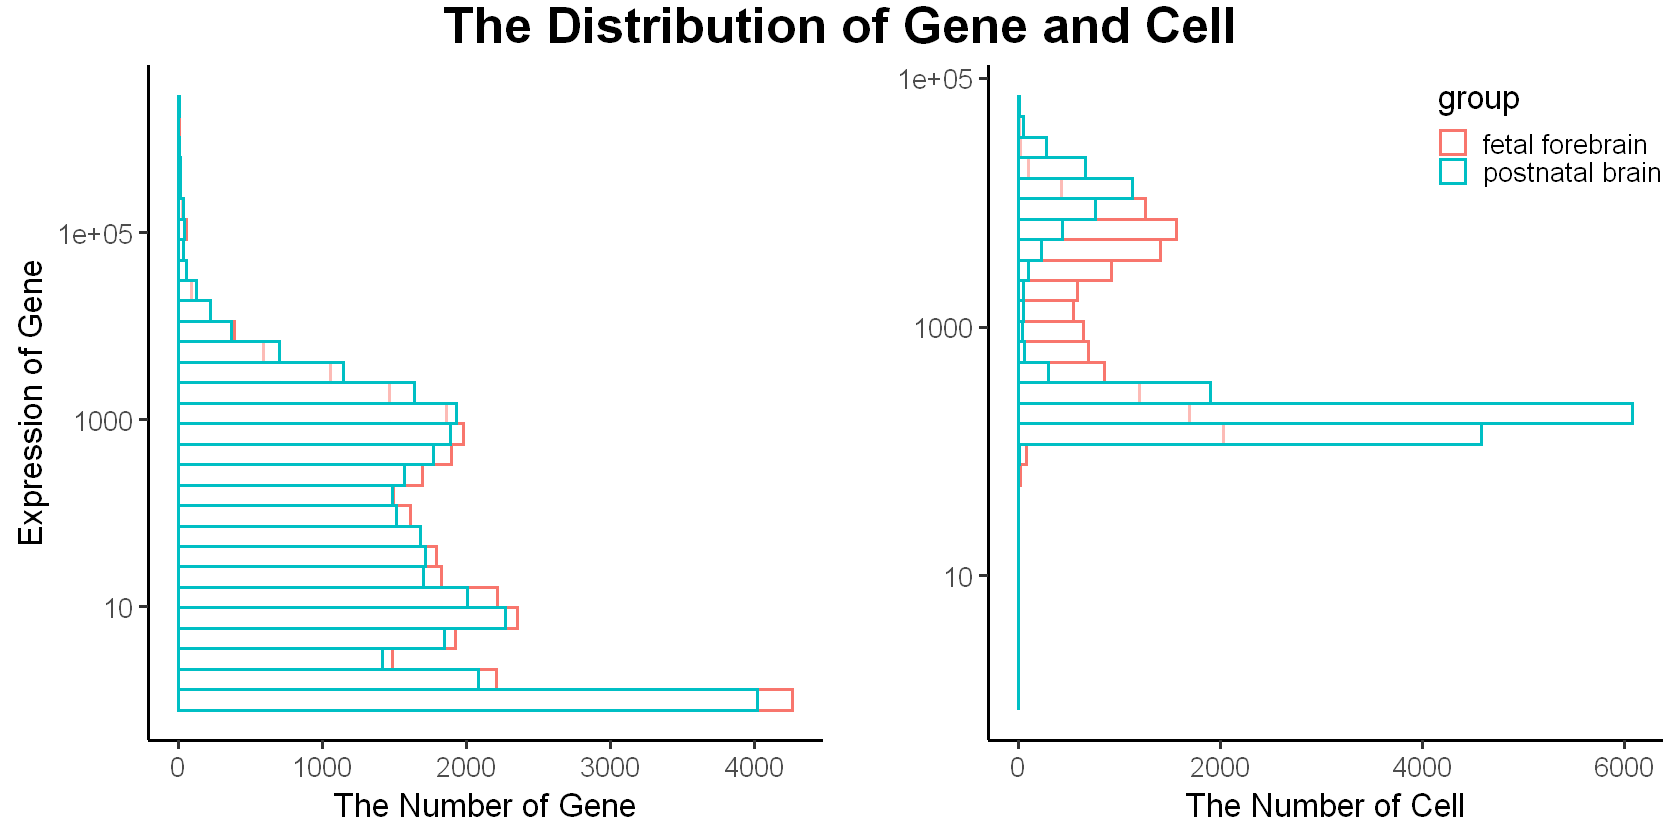

In [53]:
options(repr.plot.width=14, repr.plot.height=7)

ggarrange(A,B,ncol = 2, nrow = 1, align = "v") %>%
    annotate_figure(top = text_grob("The Distribution of Gene and Cell", face = "bold", size = 30))

이 그림을 통해서 알 수 있는 것은 expression 정도에 대해서 gene의 분포는 fetal forebrain과  postnatal brain이 비슷하다는 것이다. 모두 많은 수의 gene들의 expression 정도는 매우 낮았고, expression이 높은 것들은 매우 희소하다는 것을 알 수 있다. 세포의 분포를 보면 일정 수준(약 100) 이하의 expression에는 세포가 분포되어 있지 않다는 것을 확인할 수 있다. 이는 기본적으로 세포에서 일정 수준의 유전자는 발현이 되어야 생명활동을 유지할 수 있기 때문에 그런 것으로 추론된다. 또한 fetal forebrain과 postnatal brain 사이에 차이를 확인할 수 있는데, fetal forebrain에서는 좀 더 고르게 퍼져있고 postnatal brain에서는 gene expression 정도에 따라 두 집단으로 구분됨을 확인할 수 있다. 이는 아마도 fetal brain이 아직 발생 과정 중에 있어서 분화가 덜 된 것이 반영된 것으로 추론된다. <br/><br/>

## Data Wrangling for Gene of Specific Cell

앞서서는 fetal forebrain과 postnatal brain의 전체 분포에서 차이를 보았다. 발현과정에서 전반적으로 나타나는 차이도 있겠지만 개별 gene 수준에서도 당연히 발현의 차이가 존재할 것이다. 따라서 특정 세포에서 발현되는 gene을 선정하여 fetal forebrain과 postnatal brain에서 어떻게 발현이 변화하는지를 알아보고자 하였다. <br/><br/>
우선 cell type maker 정보를 담고 있는 `cell_mkr`에서 Dopaminergic neuron에서 발현되는 gene과 GABAergic neuron에서 발현되는 gene을 필터링하였다.

In [58]:
cell_mkr1 <- cell_mkr %>% 
    filter(organ == "Brain") %>%
    merge(x = ., y = gn %>% select(symbol, name, gene_family, ensembl_gene_id),
          by.x = "official.gene.symbol", by.y = "symbol")

In [59]:
DN_gene <- cell_mkr1 %>% 
    filter(cell.type == 'Dopaminergic neurons') %>%
    .$ensembl_gene_id

In [60]:
GB_gene <- cell_mkr1 %>% 
    filter(cell.type == 'GABAergic neurons') %>%
    .$ensembl_gene_id

<br/><br/>
이렇게 골라낸 gene를 이용하여 fetal forebrain과 postnatal brain을 나타내는 데이터 `fetal`과 `human_brain`에서 Dopaminergic neuronal gene과 GABAergic neuronal gene의 발현양을 담은 데이터 `DN`과 `GB`를 만들었다. 

In [61]:
GBf_cell <- fetal %>%
    mutate(gene_id = gsub(".*_","",gene)) %>%
    mutate(gene_id = gsub("\\..*","", gene_id)) %>%
    filter(gene_id %in% GB_gene) %>%
    mutate(group = "fetal forebrain")

In [62]:
GBp_cell <- human_brain %>%
    mutate(gene_id = gsub(".*_","",gene)) %>%
    mutate(gene_id = gsub("\\..*","", gene_id)) %>%
    filter(gene_id %in% GB_gene) %>%
    mutate(group = "postnatal brain")

In [63]:
DNf_cell <- fetal %>%
    mutate(gene_id = gsub(".*_","",gene)) %>%
    mutate(gene_id = gsub("\\..*","", gene_id)) %>%
    filter(gene_id %in% DN_gene) %>%
    mutate(group = "fetal forebrain")

In [64]:
DNp_cell <- human_brain %>%
    mutate(gene_id = gsub(".*_","",gene)) %>%
    mutate(gene_id = gsub("\\..*","", gene_id)) %>%
    filter(gene_id %in% DN_gene) %>%
    mutate(group = "postnatal brain")

In [65]:
GB <- merge(x = aggregate(value~gene, GBf_cell, sum), y = aggregate(value~gene, GBp_cell, sum), 
      by = "gene", all = TRUE) %>% 
    mutate(Cell_type = "GABAergic neuron")
DN <- merge(x = aggregate(value~gene, DNf_cell, sum), y = aggregate(value~gene, DNp_cell, sum), 
      by = "gene", all = TRUE) %>%
    mutate(Cell_type = "Dopaminergic neuron")

## Discussion for The Change of Specific-Cell-related Gene Expression 

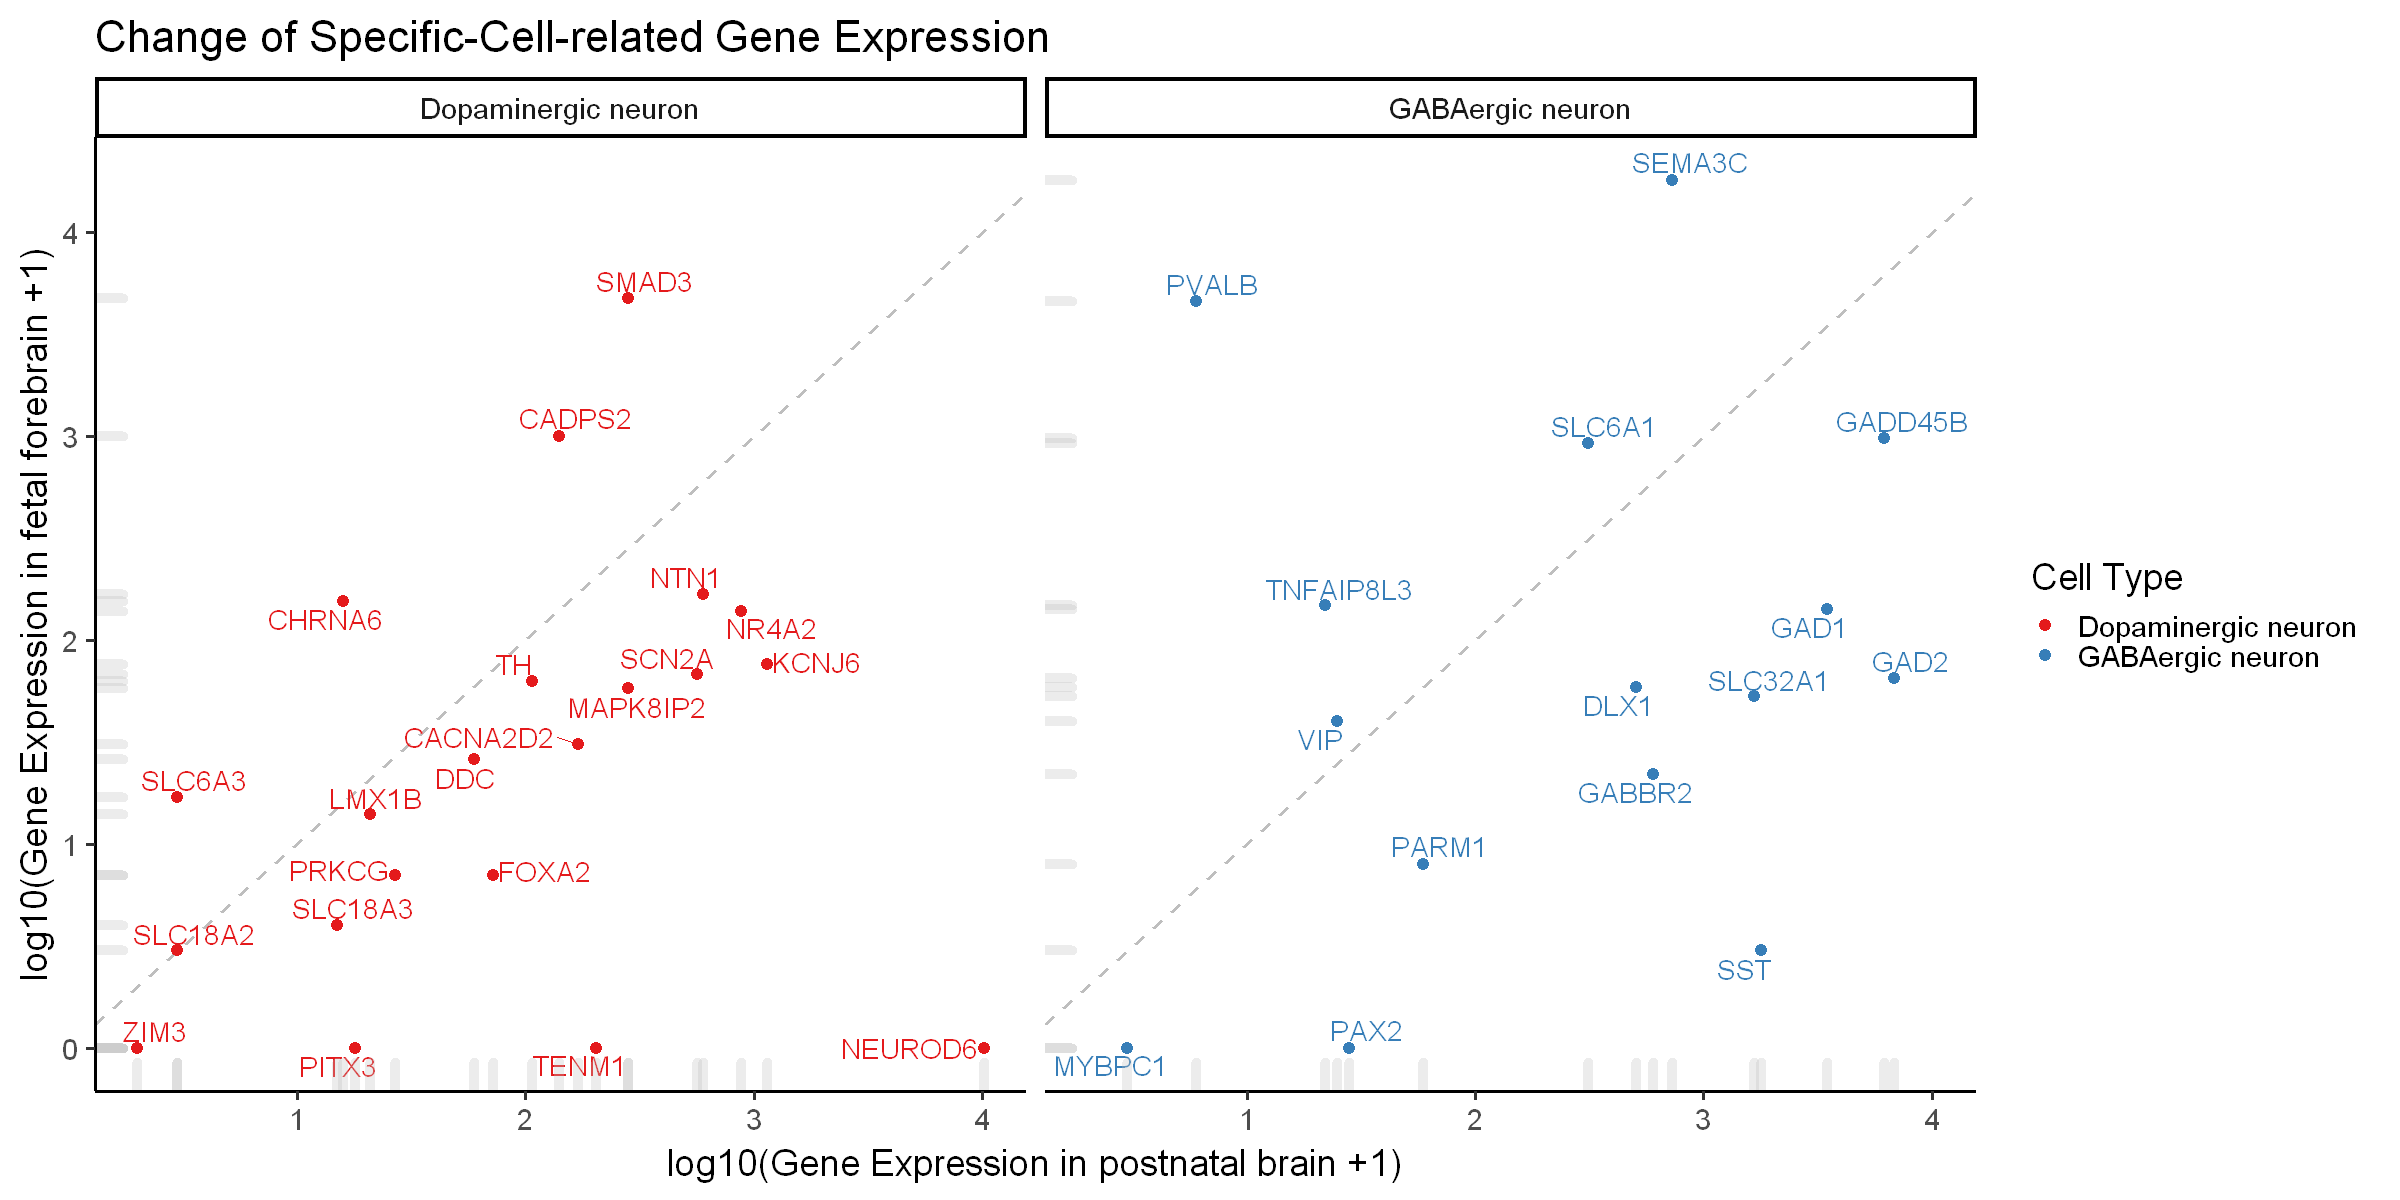

In [72]:
options(repr.plot.width=20, repr.plot.height=10)

rbind(GB, DN)%>% 
    mutate(value.y = replace_na(value.y, 0)) %>%
    mutate(gene_symbol = gsub("_.*","",gene)) %>%
    rename(fetal_brain = value.x, postnatal_brain = value.y) %>%
    ggplot(aes(log10(fetal_brain + 1), log10(postnatal_brain+1), color = Cell_type)) +
    geom_abline(aes(slope = 1, intercept = 0), color = "grey", lwd = 1, linetype = "dashed") +
    geom_point(size = 3) +
    geom_text_repel(aes(label = gene_symbol), size = 6, show.legend = FALSE) +
    geom_rug(col="grey",alpha=0.3, size=3) +
    facet_wrap(~Cell_type)  +
    labs(x = "log10(Gene Expression in postnatal brain +1)", 
         y = "log10(Gene Expression in fetal forebrain +1)", 
         title = "Change of Specific-Cell-related Gene Expression",
         color = "Cell Type")+
    theme_classic(base_size = 22)+
    theme(text = element_text(size = 22) )+ 
    scale_color_brewer(palette="Set1")


위 플롯에는 y = x 직선이 있어 이 선을 기준으로 위쪽에 존재하는 것은 fetal forebrain(FFB)에서 postnatal brain(PNB)이 됨에 따라 발현양이 감소한 gene들이고 아래쪽에 존재하는 것들은 태어난 이후 시간이 지나고 난 후에 발현양이 증가한 gene들이다. 이를 토대로 관찰을 해보면 Dopaminergic neuron에서는 대부분의 gene이 FFB과 PNB에서 유사한 정도로 발현되었고 PNB에서 약간 더 많이 발현되는 것을 관찰할 수 있다. 반면에 GABAergic neuron에서는 FFB와 PNB에서 발현의 차이를 보이는 gene들이 더 많다는 것을 확인할 수 있다. 이러한 차이는 역시 시기에 따라서 변화하는 transcription factor나 여러 다른 조건들이 특정 gene 수준에서 작용한다는 것을 보여주는 증거이다.<br/><br/>
개별적인 gene수준에서 봤을 때는 FFB와 PNB에서 발현되는 차이가 큰 gene에 주목할 필요가 있다. 이는 플롯의 대각선을 가로지르는 선의 기울기를 기준으로 했을 때 원점과 이은 점의 기울기가 큰 gene에 해당한다. 이러한 gene은 특정 발달과정에서 중요한 역할을 한 후에 발현의 필요가 없어져 PNB에서는 발현이 되지 않은 gene일 수도 있고, 아니면 특정 발달과정으로 인해 발현이 활발하게 일어나는 gene일 수도 있다. 따라서 이러한 gene들을 탐색하는 것은 발달과정에서 뇌에 일어나는 변화를 발견하는 것과 직결되어 있는 것이라 생각한다. 
<br/><br/>

## Reference

Oscar Franzén, Li-Ming Gan, Johan L M Björkegren, PanglaoDB: a web server for exploration of mouse and human single-cell RNA sequencing data, Database, Volume 2019, 2019, baz046,